# Plotting 
This notebook shows an example plot often used in this repository. This package also provides a few features that can help visualizing results.

In [1]:
import openmc_fusion_benchmarks as ofb
import matplotlib.pyplot as plt
import numpy as np

First we instantiate a ResultsFromDatabase object reading a hdf results file and we load an example tally with the `get_tally_dataframe()` method (see the `read_database_hdffile.ipynb` notebook for more information).

In [2]:
experiment_file = ofb.ResultsFromDatabase(filename='experiment.h5', path='example_database')
results = experiment_file.get_tally_dataframe(tally_name='rr_offaxis_nb93')

We print the x-axis suggested:

In [3]:
xaxis = experiment_file.get_tally_xaxis(tally_name='rr_onaxis1_al27')

xaxis

'Shield depth (cm)'

We finally plot the tally.

This package provides in the a couple of tools that help adding visualization features (see `visualization.py` file for more information). 
- One is the `get_floor_ceiling()` function. It authomatically frames the plot on the y-axis by finding the min and max values of the dataset to plot or their min and max order of magnitudes depending if the plot has either a linear or a logarithmic y scale (the function takes in either an array of values or a list of arrays in order to be able to check the max and min of multiple arrays superimposed on the same plot)
- Another feature is the `plot_stddev_area()` function. It plots the errorbars of the dataset as shaded areas and can account for 1,2 or 3 std. dev. depending on the precision wanted


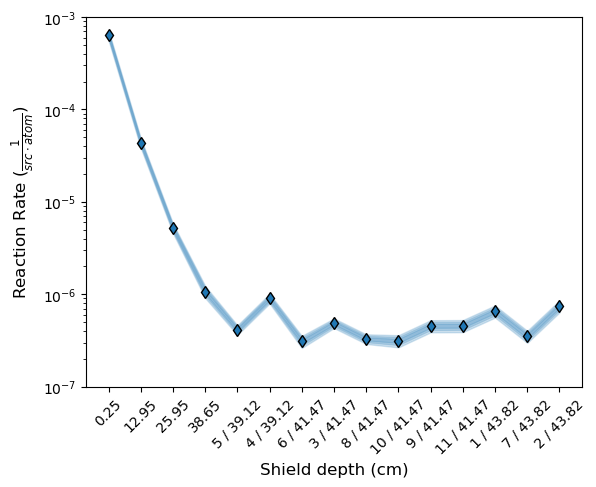

In [4]:
tickers = np.arange(len(results['mean']))

fig, ax = plt.subplots()
ofb.add_floor_ceiling(ax=ax, values=results['mean'], scale='log', gap=0)
ofb.plot_stddev_area(ax=ax, ticks=tickers, mean=results['mean'], std_dev=results['std. dev.'],
                     color='tab:blue', alpha=.2, uncertainty_deg=3)
ax.plot(tickers, results['mean'], marker='d', mec='k', ls='', color='tab:blue')
ax.set_xticks(tickers)
ax.set_xticklabels([el.decode() for el in results[xaxis]])
ax.tick_params(axis='x', labelrotation=45)
ax.set_xlabel(xaxis, fontsize=12)
ax.set_ylabel(r'Reaction Rate $(\frac{1}{src \cdot atom})$', fontsize=12)
ax.set_yscale('log')

plt.show()